In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X train", x_train.shape)
print("X test", x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X train (60000, 28, 28)
X test (10000, 28, 28)


In [3]:
print("Y train", y_train.shape)
print("Y test", y_test.shape)

Y train (60000,)
Y test (10000,)


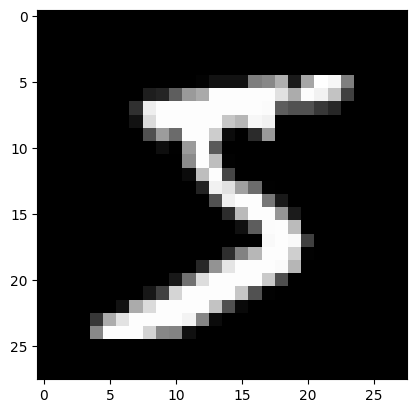

5


In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(y_train[0])

NN create
- Conv (filter=5)
- Max (kernel 2x2)
- Conv (filter = 12)
- Max (kernel 2x2)
- Flatten
- Hidden - 32
- Output - 10

In [5]:
input_shape = (28,28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(5,5), input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(rate=.25))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics =['accuracy'],
)

In [9]:
# Callback
# early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# checkpoint system
cp = tf.keras.callbacks.ModelCheckpoint(
        filepath = 'mnist_model/ckpt',
        save_freq = 10,
        monitor='val_loss',
        verbose=1,
        save_best_only=True
    )

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs=100,
    callbacks=[es],
    validation_data = (x_test, y_test),
    shuffle = True
)

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color='red')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='red')
plt.show()

In [18]:
model.save('mnist.keras')

In [ ]:
model.predict([])

In [28]:
np.expand_dims(x_train[0],axis=0).shape

(1, 28, 28)

In [31]:
inp = np.expand_dims(x_train[0],axis=0)
model.predict(inp).argmax()

1/1 [==============================] - 0s 20ms/step


5